In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
#MNIST데이터 셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [5]:
#생성자 모델을 만듭니다.
autoencoder = Sequential()

In [6]:
# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [7]:
# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [8]:
# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [9]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2155 - val_loss: 0.1394
Epoch 2/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1280 - val_loss: 0.1181
Epoch 3/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1148 - val_loss: 0.1100
Epoch 4/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1084 - val_loss: 0.1048
Epoch 5/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1043 - val_loss: 0.1013
Epoch 6/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1013 - val_loss: 0.0987
Epoch 7/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0990 - val_loss: 0.0967
Epoch 8/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0972 - val_loss: 0.0951
Epoch 9/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0957 - val

In [12]:
#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
random_test

array([9476, 8258, 2196, 7910, 5256])

In [13]:
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.
ae_imgs

array([[[[6.09915787e-06],
         [1.09143317e-08],
         [2.32470558e-08],
         ...,
         [2.15025395e-07],
         [4.86600470e-07],
         [2.40990289e-06]],

        [[2.42269333e-08],
         [8.72033140e-11],
         [4.91556129e-10],
         ...,
         [2.60771618e-08],
         [5.99191239e-08],
         [2.77168351e-06]],

        [[3.82375838e-08],
         [4.07838596e-10],
         [1.91024818e-09],
         ...,
         [4.01229769e-08],
         [9.81976100e-08],
         [2.39331166e-06]],

        ...,

        [[8.01407259e-06],
         [4.04434502e-07],
         [4.94407061e-07],
         ...,
         [4.18715672e-07],
         [2.70384203e-06],
         [3.68473266e-05]],

        [[1.94816130e-06],
         [4.12686632e-08],
         [5.02684046e-08],
         ...,
         [2.45178882e-08],
         [1.28873637e-07],
         [1.33196554e-05]],

        [[8.28506381e-06],
         [7.42286943e-07],
         [6.69410042e-07],
         ...,
 

In [14]:
plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

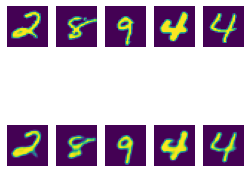

In [15]:
for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()